<a href="https://colab.research.google.com/github/SamaSamrin/Computer-Vision-Assignments/blob/main/2%20Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

Consider any image of your choice as input. Then, carry out three basic transformations – rotation, translation, and scaling (your choice of angle, distance, and scale) using a Python program.

* For each transformation, plot the histogram of the image. Compare the histograms of the original image and transformed image. Are these different for different transformations? How does your choice of angle, distance or scale affect these histograms? Explain clearly.

* Apply all three transformations (composition) on your input image. Does the order of transformation matter in the composition? Why or why not? Explain the differences in the output image.

* You are allowed to use built-in functions from various Python libraries. Explain your choices and the values of parameters used via a well-commented code.

**Deliverables:** Input image, Python code, Analysis report for Part a. and b. with appropriate output snapshots and references.

***Note for self***

**OpenCV Histogram:** the x-axis represents the different color values, which lie between 0 and 255, and the y-axis represents the number of times a particular intensity value occurs in the image.

# Input Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import load_img, img_to_array

import cv2
from google.colab.patches import cv2_imshow

from PIL.Image import Image, open

In [ ]:
img = cv2.imread('cat.jpg')

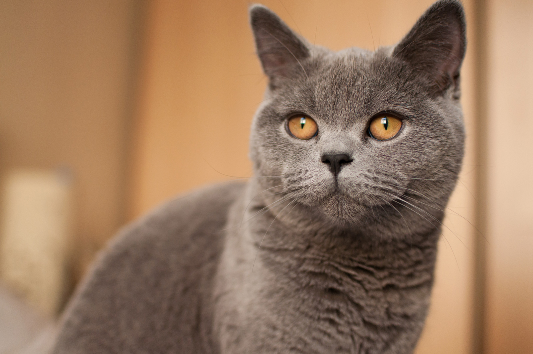

In [ ]:
height, width = img.shape[:2]
temp_img = cv2.resize(img, (int(width/3), int(height/3)))

cv2_imshow(temp_img)

GRAYSCALE histogram

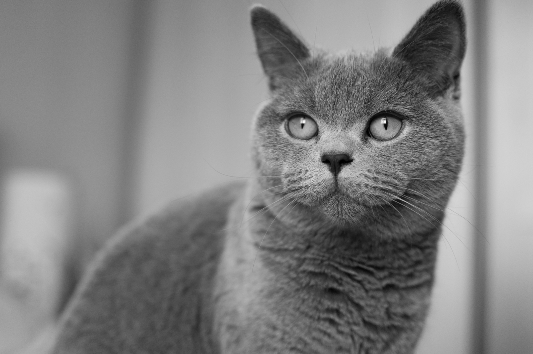

In [ ]:
#turning our image into grayscale to evaluate the overall or general intensity among its pixels
img_gray = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

height, width = img_gray.shape[:2]
temp_img = cv2.resize(img_gray, (int(width/3), int(height/3)))

cv2_imshow(temp_img)

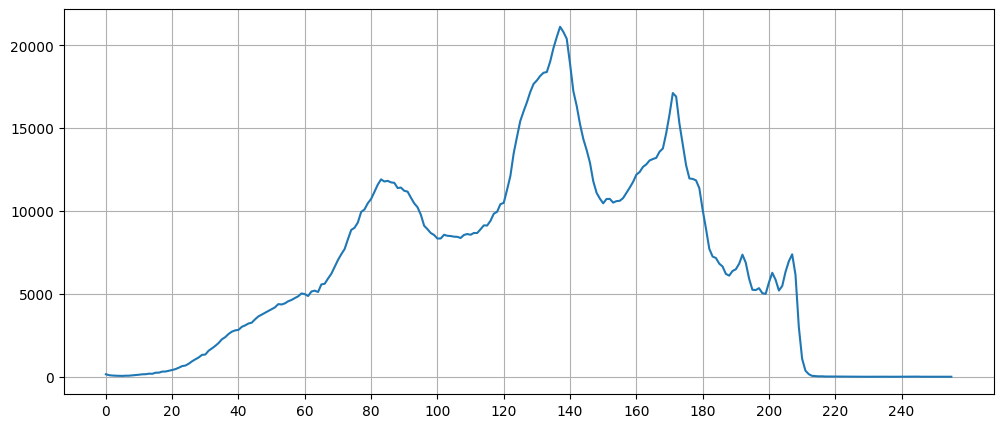

In [ ]:

hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])

plt.figure(figsize=(12,5))
plt.plot(hist)
plt.xticks(np.arange(0,260, step=20))
plt.grid()

plt.show()


The x-axis represents the colors valued within the range 0 to 255. We can see that most of the pixels fall between 130 and 140.

For the grayscale colors, the leftmost point (0) is the darkest or black while the rightmost point (255) is the brightest or white. So, from the histogram, we can see that our image is a middle shade of gray (not too light nor too dark) since the peak values are around the middle (130-140).

RGB or COLORFUL histogram

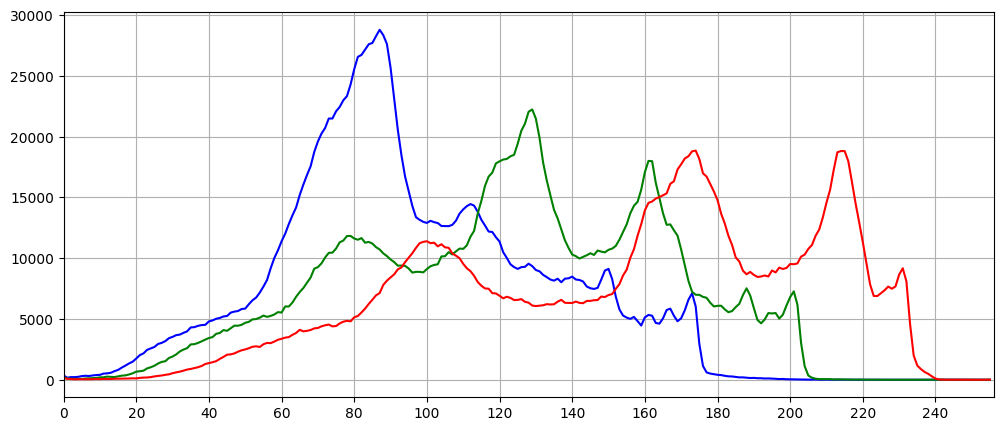

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(np.arange(0,260, step=20))

color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([img],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])

plt.grid()
plt.show()

From this histogram, we can see that:
* blue peaks at (90, 28000)
* green peaks at (130, 22500)
* red peaks at (215, 18000)

Now, the RGB value of (90, 130, 215) generates a color like this:

(-0.5, 63.5, 63.5, -0.5)

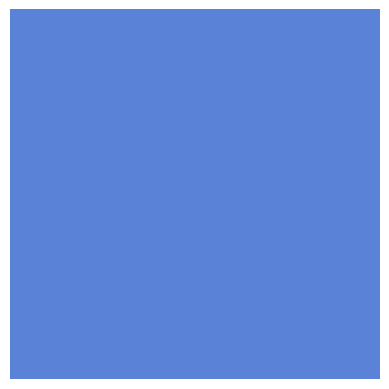

In [ ]:
height, width, channel = 64, 64, 3
red, green, blue = 90, 130, 215

arr = np.full((height, width, channel), [red, green, blue], dtype=('uint8'))

plt.imshow(arr)
plt.axis('off')

So the image seems to be the richest in blue color. In other words, among the 3 color channels, the blue one contains the highest or peak values which means it appeared most frequently in the image.

At first glance it is a bit surprising because visually we don't see much blue color in the image. It is mostly black-gray color of the cat and white-brownish background.

#  Reshaping Image for ImageDataGenerator

Reshaping image now since the Image Data Generator takes images whose shapes consist of 4 values, not 3.

Typically the shape of an image is (width, height, number of channels). But for feeding the image to the IDG, it also needs an additional dimension. This 4th dimension functions as the batch size.

In [ ]:
img = load_img('cat.jpg')
img = img_to_array(img)

In [ ]:
img.shape

(1063, 1600, 3)

In [ ]:
img = img.reshape((1,) + img.shape)

img.shape

(1, 1063, 1600, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Rotation

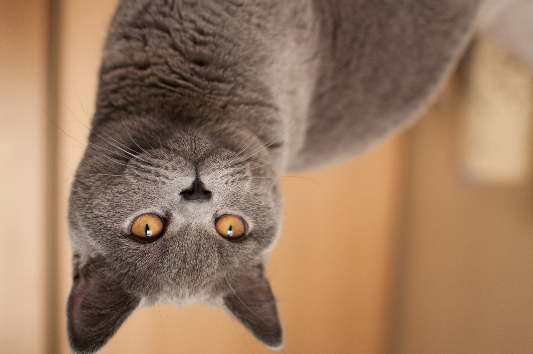

In [ ]:
#import imutils
#rotated = imutils.rotate_bound(img, 120)
#from scipy.ndimage import rotate as rotate_image
#rotated = rotate_image(img,120)

# - not using the above methods because they add a black box around the rotated image, and can therefore influence the resulting histogram heavily

rotated = cv2.rotate(img, cv2.ROTATE_180)

height, width = img.shape[:2]

cv2_imshow(cv2.resize(rotated, (int(width/3), int(height/3))))

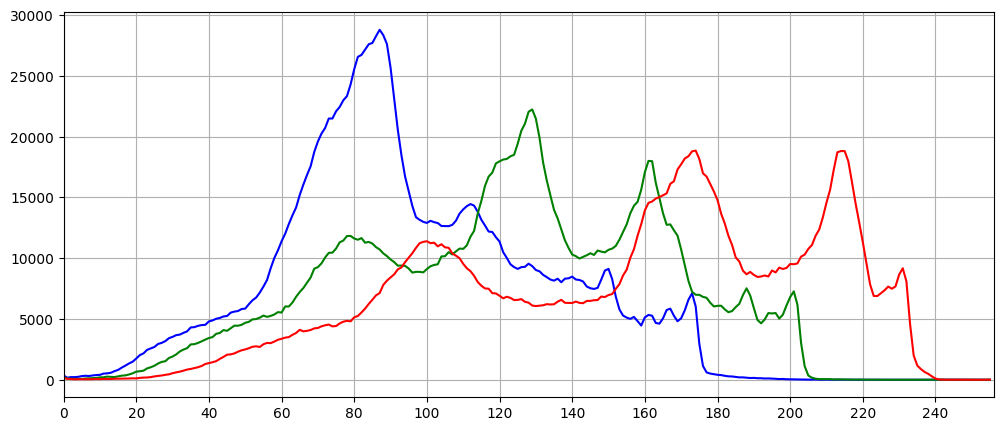

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(np.arange(0,260, step=20))

color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([rotated],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])

plt.grid()
plt.show()

It is almost exactly the same as the original image's histogram

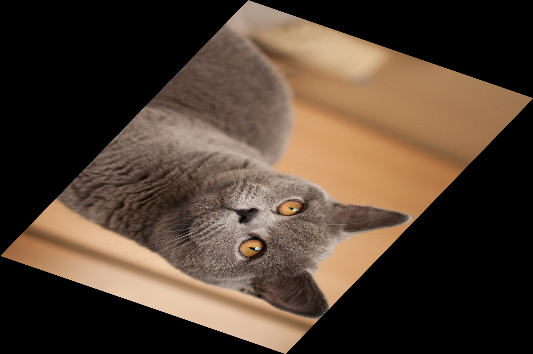

In [ ]:
import imutils
rotated_with_box = imutils.rotate_bound(img, 120)

height, width = rotated.shape[:2]

cv2_imshow(cv2.resize(rotated_with_box, (int(width/3), int(height/3))))

In [ ]:
img.shape

(1063, 1600, 3)

In [ ]:
rotated.shape

(1063, 1600, 3)

In [ ]:
rotated_with_box.shape

(1917, 1720, 3)

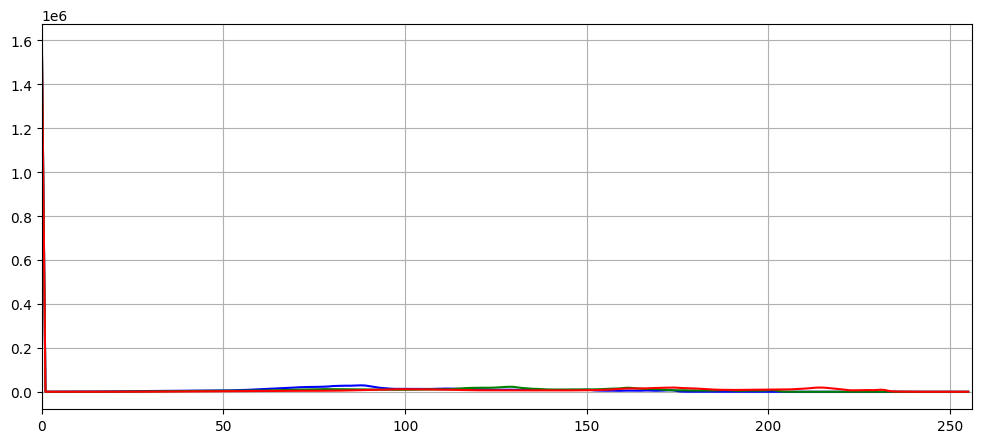

In [ ]:
plt.figure(figsize=(12, 5))

color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([rotated_with_box],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])

plt.grid()
plt.show()

Here, all the colors have drastically changed their intensity values. Red seems to be at its highest point at 0 which represents the darkest color and this makes sense because most of the photo is now the black background. However, almost all other pixels are close to the zero mark. So we can say that this rotated photo is significantly darker than the original one, and also the 180-degree rotated one.

Aside from the histogram, we can observe another change in its shape or dimensions. It has grown from 1063x1600 to 1917x1720.

#Translation

This is basically mapping an input image from its existing system or coordinate space to another system or coordinate space. We'll use **affine transformation** for this to preserve parallelism of the lines or edges in the image.

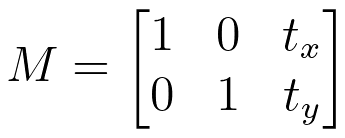

We also need a **transformation matrix** which can map an original set of vertices to a new set of vertices.

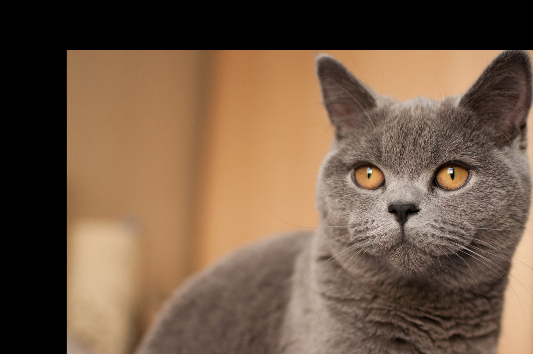

In [ ]:
#translation matrix M that moves 200 pixels in right direction and 150 pixels towards the bottom
M = np.float32([[1,0,200],[0,1,150]])

#affine transformation
height, width = img.shape[:2]
translated = cv2.warpAffine(img,M,(width,height))

cv2_imshow(cv2.resize(translated, (int(width/3), int(height/3))))

In [ ]:
translated.shape

(1063, 1600, 3)

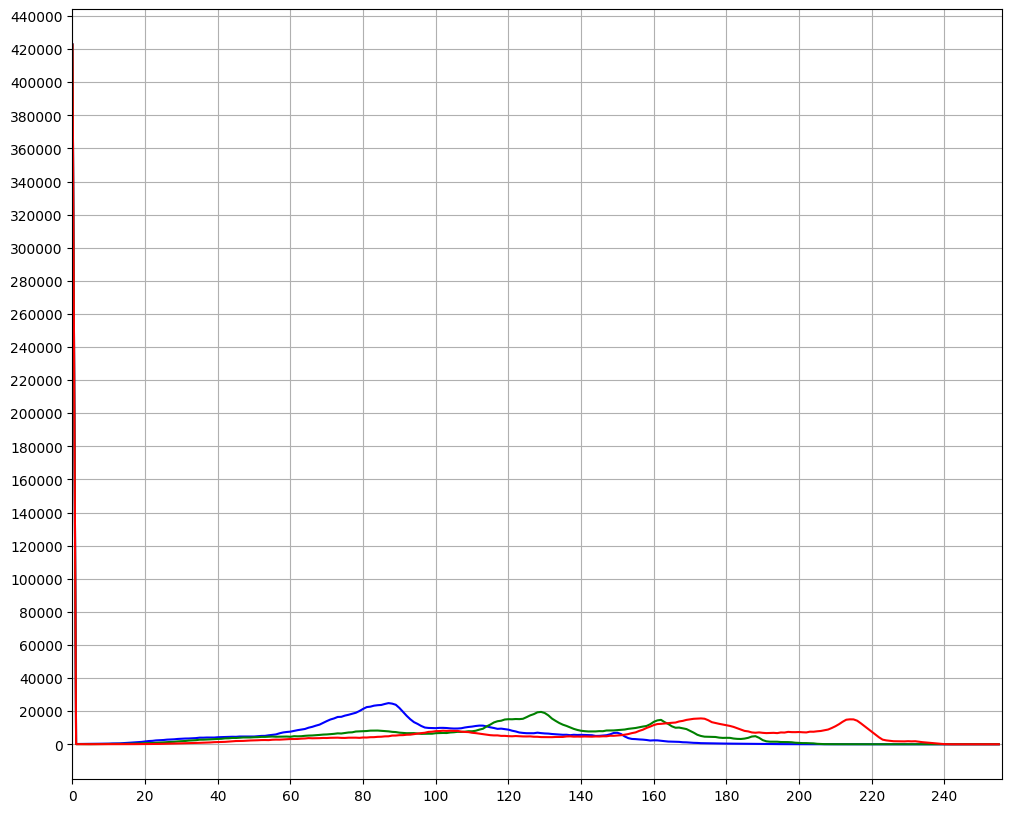

In [ ]:
plt.figure(figsize=(12, 10))
plt.xticks(np.arange(0,260, step=20))
plt.yticks(np.arange(0,450000, step=20000))

color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([translated],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])

plt.grid()
plt.show()

Compared to the original image's histogram, this one of the translated image shows a drastic drop in the intensity values of most colors. On the other hand, the colors closest to black sees a gigantic rise.

#Scaling (your choice of angle, distance, and scale)

In [ ]:
#scale_up = 1.3 - image turns out too big
scale_down = 0.4

img_smaller = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
#img_slarger= cv2.resize(img, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_LINEAR)


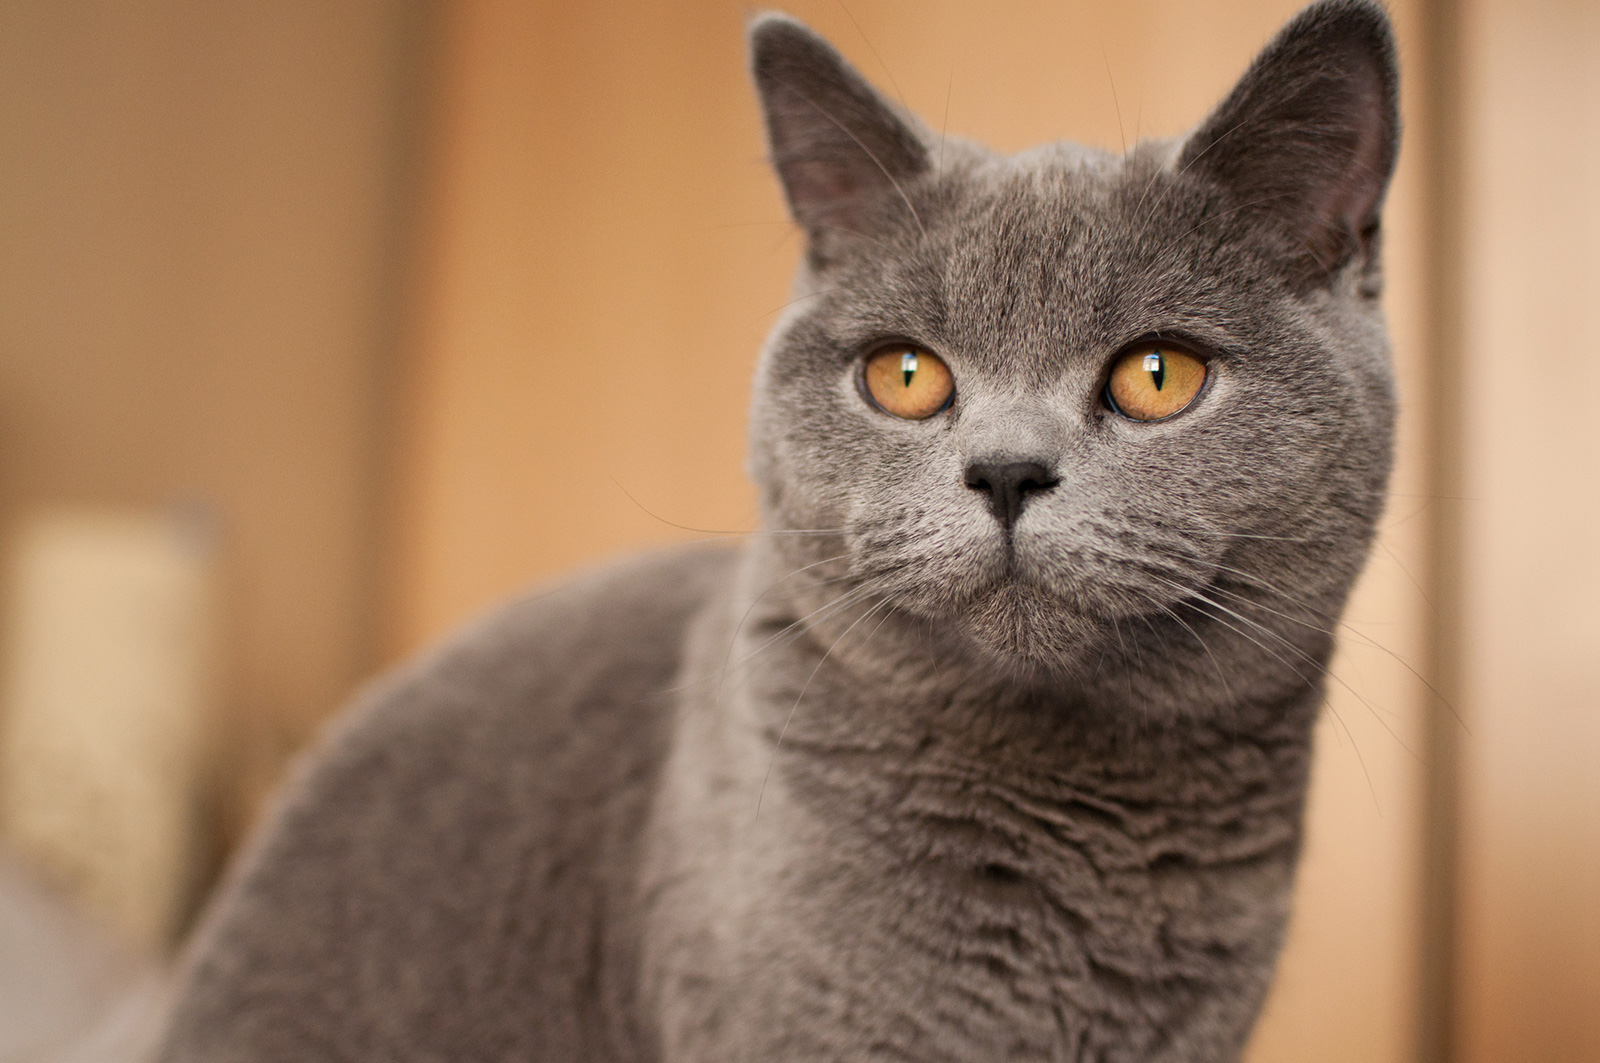

In [ ]:
cv2_imshow(img)

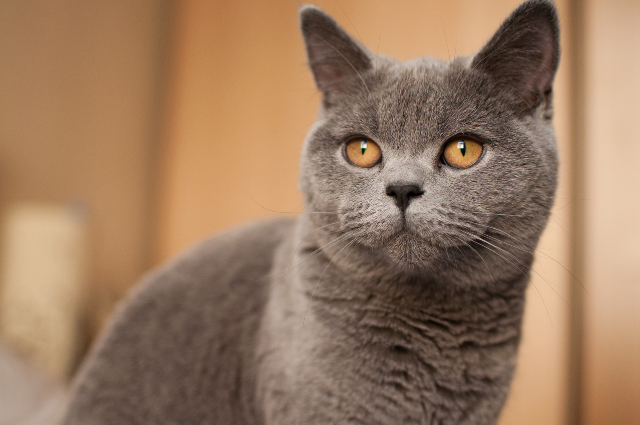

In [ ]:
cv2_imshow(img_smaller)

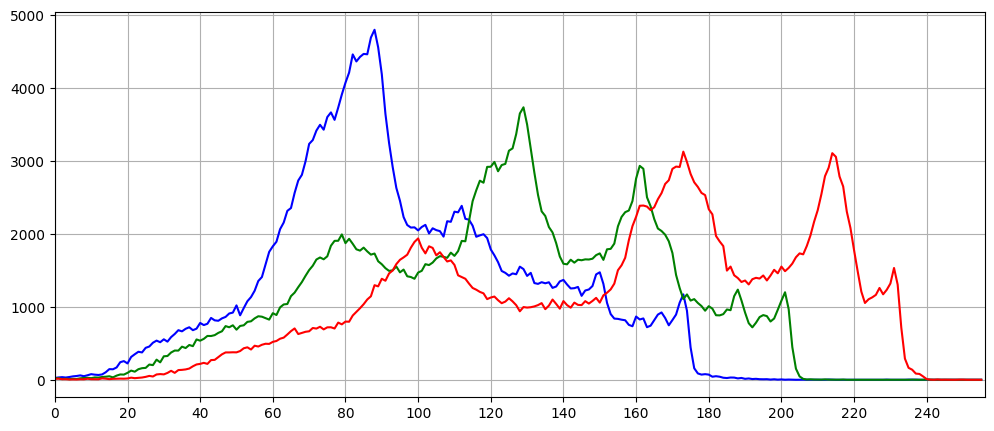

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(np.arange(0,260, step=20))

color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([img_smaller],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])

plt.grid()
plt.show()

This histogram is the same as the original image's histogram. This makes sense since we didn't change any component within the image (or its matrix), we just resized it to a smaller frame

# Apply all three transformations (composition) on your input image.
Does the order of transformation matter in the composition? Why or why not? Explain the differences in the output image.

In [ ]:
tx = 24
ty = -10

theta = 90
cos_theta = 0 #since cos90 = 0
sin_theta = 1 #since sin90 = 1, not taking 180 as theta because sin180 = 0

translation_matrix = np.array([[1,0,tx], [0,1,ty], [0,0,1]])
translation_matrix_2D = np.float32([[1,0,tx], [0,1,ty]])

rotation_matrix = np.array([[cos_theta, -1,0], [sin_theta, cos_theta, 0], [0,0,1]])
rotation_matrix_2D = np.float32([[cos_theta, -1,0], [sin_theta, cos_theta, 0]])

scaling_matrix = np.array([[(-2)/1.414, 0,0], [0, 1.414, 0], [0,0,1]]) #root 2 = 1.414, here we take Sx = -2/root2, Sy = root 2
scaling_matrix_2D = np.array([[(-2)/1.414, 0,0], [0, 1.414, 0]])

In [ ]:
height, width = img.shape[:2]

In [ ]:
#Translation
composition_translated = cv2.warpAffine(img,translation_matrix_2D,(width,height))

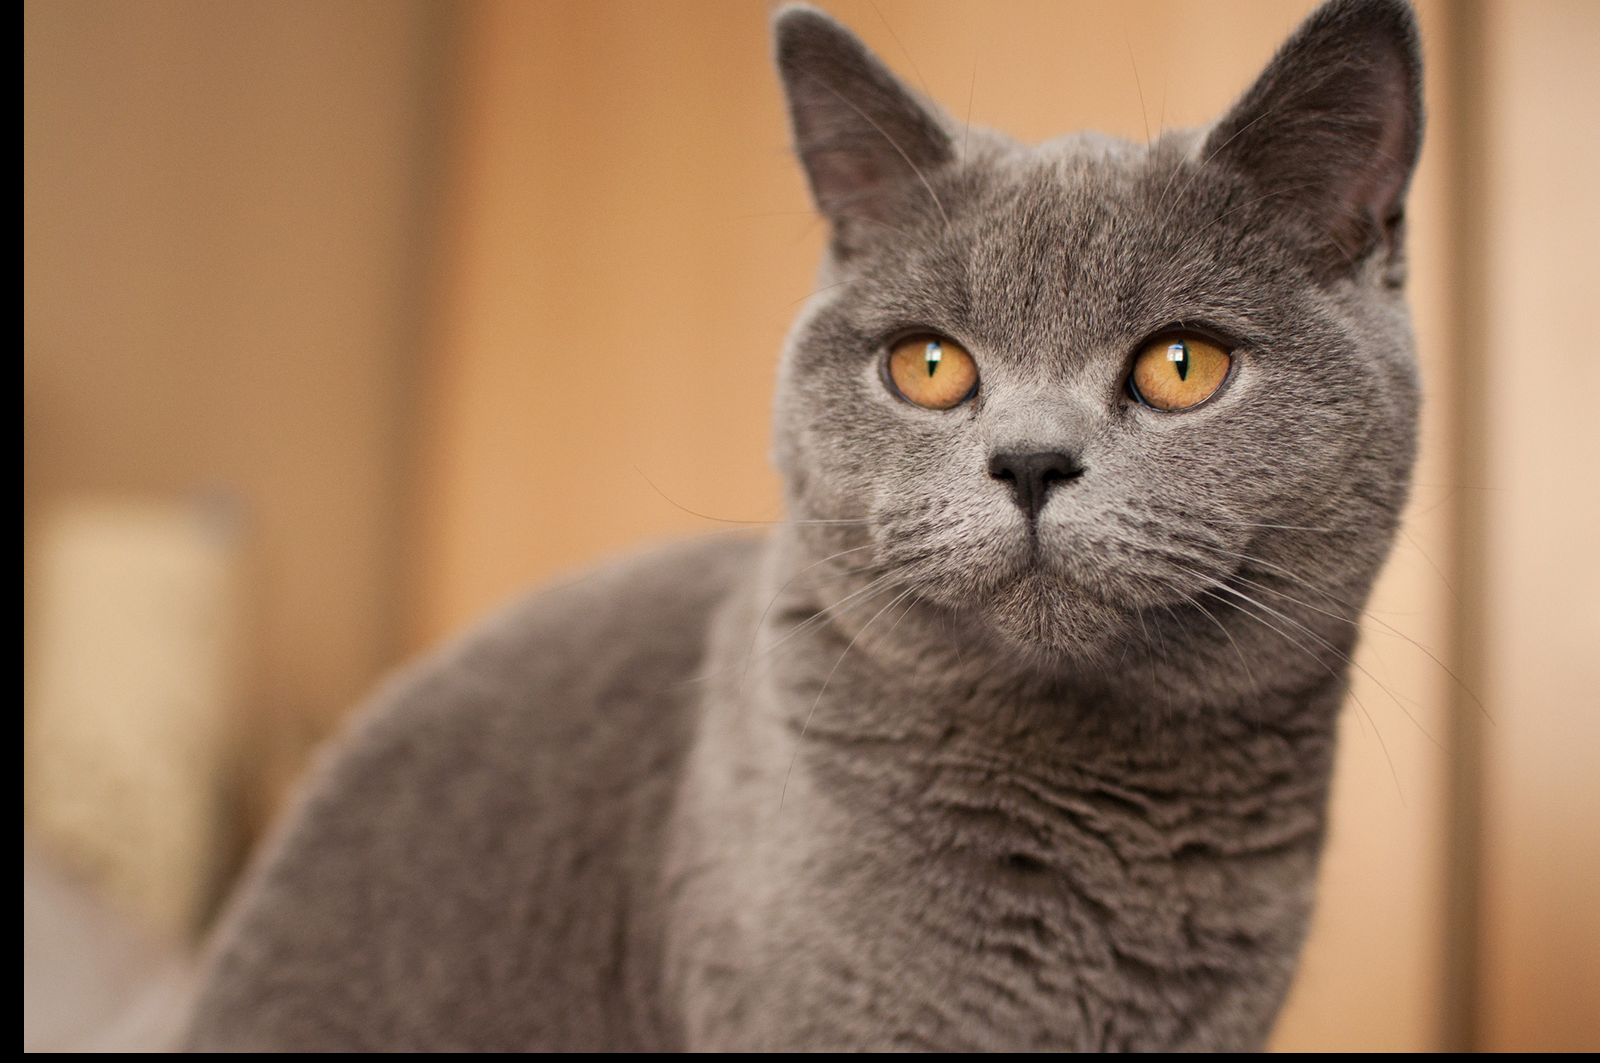

In [ ]:
cv2_imshow(composition_translated)

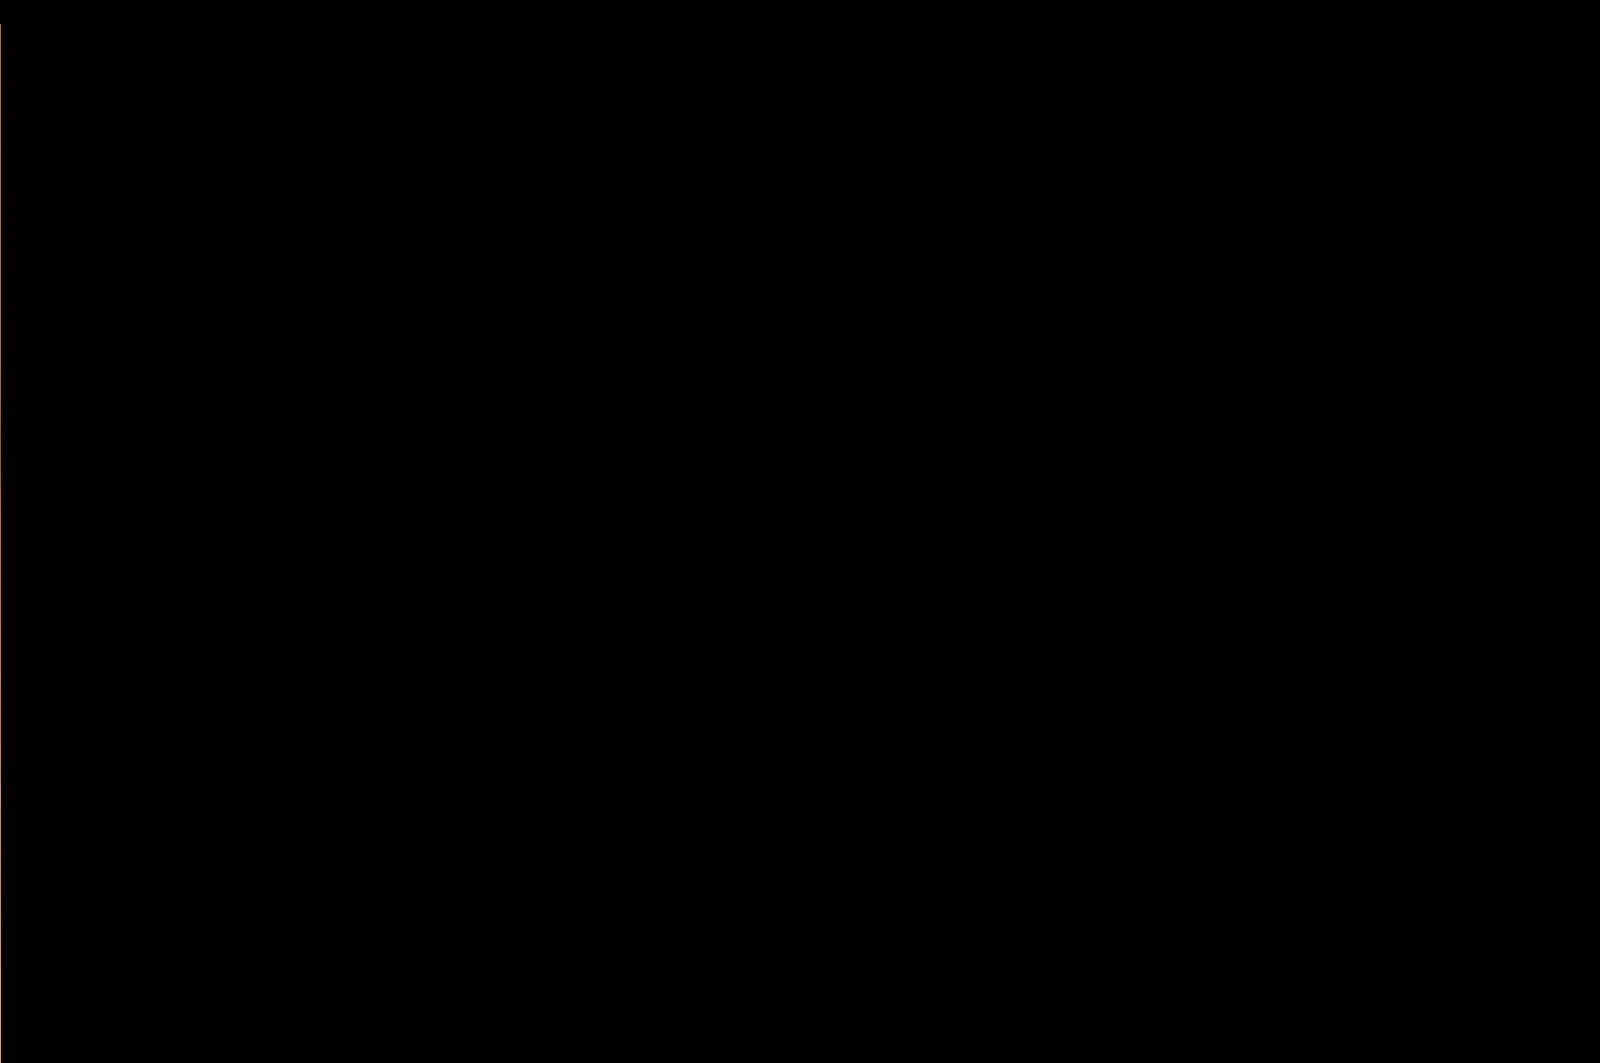

In [ ]:
#Rotation
composition_rotated = cv2.warpAffine(composition_translated,rotation_matrix_2D,(width,height))

cv2_imshow(composition_rotated)

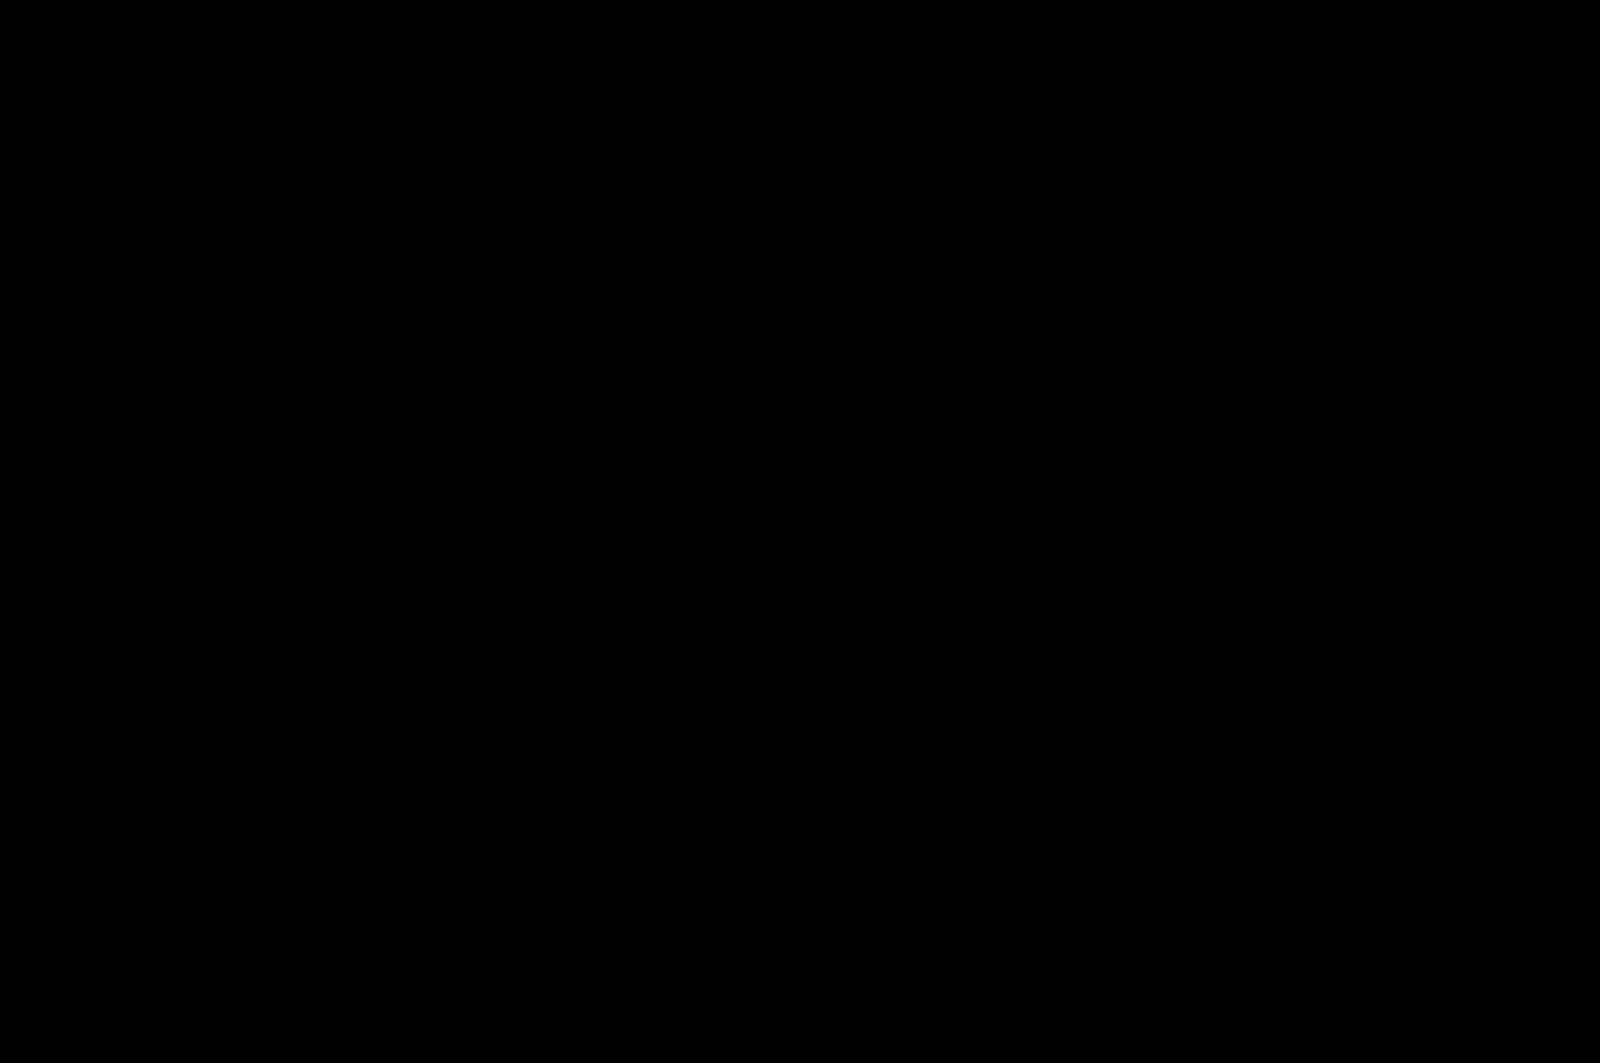

In [ ]:
#scaling
composition_scaling = cv2.warpAffine(composition_translated,scaling_matrix_2D,(width,height))

cv2_imshow(composition_scaling)

The order of transformation does not matter because each matrix is of the same size 3x3.

#Resources Used

1. https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html [for histogram]
2. https://celik-muhammed.medium.com/how-to-create-rgb-image-in-python-programing-language-from-jupyter-notebook-4a78db8205d7 [creating image from RGB values]
4. https://www.tutorialspoint.com/how-to-perform-image-translation-using-opencv-in-python  [image translation]
5. https://pyimagesearch.com/2021/02/03/opencv-image-translation/  [image translation]
6. https://learnopencv.com/image-resizing-with-opencv/ [image scaling]
7. https://math.stackexchange.com/questions/237369/given-this-transformation-matrix-how-do-i-decompose-it-into-translation-rotati